## Thera Bank Personal Loan Modelling Project Jan 2020

#### 1. Import the datasets and libraries, check datatypes, statistical summary, shape, null values or incorrect imputation

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [68]:
seed_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
seed_data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
print('---------------check data types---------------')
print(seed_data.info()) # check data types and except for CCAvg a float type all others are int64 type. 
print('---------statistical summary-----------------')
print(seed_data.describe().T) # transposed statistical summary.ID,ZIP code int64 types does not add value
print('--------------shape--------------------')
print(seed_data.shape) # shape - 5000 rows and 14 columns detected
print('--------null value checks------------------')
print(seed_data.isnull().sum()) # null value check and no null values detected

---------------check data types---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
---------statistical summary-----------------
                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Ag

#### 2. Study the data distribution in each attribute and target variable, share your findings 

###### Number of unique in each column?

In [70]:
seed_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###### Number of people with zero mortgage?

In [71]:
zero_mortgage = seed_data[seed_data['Mortgage']==0] # filter for zero mortgage
print('No of people with zero mortgage:=',zero_mortgage['Mortgage'].count())

No of people with zero mortgage:= 3462


###### Number of people with zero credit card spending per month?

In [72]:
zero_cc_spend = seed_data[seed_data.CreditCard==0] # filter for zero credit card spend
print('No of people with zero credit card spending:',zero_cc_spend['CreditCard'].count())

No of people with zero credit card spending: 3530


###### Value Counts for all categorical counts

In [73]:
# the categorical columns are  ['Age','Education','Experience'] age can be grouped for ranges.
print('------------Value Counts for Age---------------------------------------')
print(seed_data['Age'].value_counts(normalize=True))
print('------------Value Counts for Education---------------------------------------')
print(seed_data['Education'].value_counts(normalize=True))
print('------------Value Counts for Experience---------------------------------------')
print(seed_data['Experience'].value_counts(normalize=True))



------------Value Counts for Age---------------------------------------
35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64
------------Value Counts for Education---------------------------------------
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
------------Value Counts for Experience---------------------------------------
 32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0

###### Grouping for Age & Experience  for future to include in the model and for plots:


The Age could be better if it is in a range like [20-30, 30-40 ,40-50,50-60 ,60-70]

In [74]:
age_group_points = np.array([20,25,30,35,40,45,50,55,60,65,70]) # age range started from 20 as the minimum is 23 from stat summary above so safe
age_group=[(age_group_points[i]+1,age_group_points[i+1]) for i in np.arange(len(age_group_points)-1)] # create age_group range
modified_seed= seed_data.copy() # copy the original dataframe to a temporary dataframe
modified_seed['Age_Group']='100' # fill a temporary age group for filtering purpose later down the line
mod1= pd.DataFrame() # a temporary dataframe to use later
age_categorized_df= pd.DataFrame() # final dataframe for result to use later

# to group age, the strategy is to check in the default 'Age_Group' if it is 100 it should be replaced by using df.drop
# then with a lambda apply to check Age is within each value in the age range tuple

for interval in age_group:
    modified_seed.drop(modified_seed[modified_seed.Age_Group!='100'].index,axis=0, inplace=True)
    modified_seed['Age_Group']= modified_seed['Age'].apply(lambda x: str(interval[0])+"-"+str(interval[1]) if x>=interval[0] and x <=interval[1]  else '100')  
    mod1=modified_seed[modified_seed.Age_Group!='100']
    age_categorized_df=age_categorized_df.append(mod1,ignore_index=True)
# categorized_df
val_count_age_group= age_categorized_df.groupby('Age_Group')['Age'].count().reset_index(name='counts')
# print(val_count_age_group['Age_Group'].value_counts(normalize=True))

Experience could be better if it is a range as well - same methodology adopted as for age however there are negative experiences which has to be imputed with 0

In [75]:
modified_seed= age_categorized_df.copy()
modified_seed.loc[modified_seed['Experience']<0]=0
modified_seed[modified_seed['Experience']==0] # imputation to repalce negatives with zero

modified_seed

exp_group_points=np.array([0,5,10,15,20,25,30,35,40,45])
exp_group = [(exp_group_points[i]+1,exp_group_points[i+1]) for i in np.arange(len(exp_group_points)-1)] # create exp_group range

modified_seed['Exp_Group']='100' # fill a temporary exp group for filtering purpose later down the line
mod1= pd.DataFrame() # a temporary dataframe to use later
exp_categorized_df= pd.DataFrame() # final dataframe for result to use later
for interval in exp_group:
    modified_seed.drop(modified_seed[modified_seed.Exp_Group!='100'].index,axis=0, inplace=True)
    modified_seed['Exp_Group']= modified_seed['Experience'].apply(lambda x: str(interval[0])+"-"+str(interval[1]) if x>=interval[0] and x <=interval[1]  else '100')  
    mod1=modified_seed[modified_seed.Exp_Group!='100']
    exp_categorized_df=exp_categorized_df.append(mod1,ignore_index=True)
exp_categorized_df
val_count_exp_group= exp_categorized_df.groupby('Exp_Group')['Experience'].count().reset_index(name='counts')
# print(val_count_exp_group['Exp_Group'])

#### Univariate and bivariate

###### Univariate

In [76]:
# Age Group , Experience Group

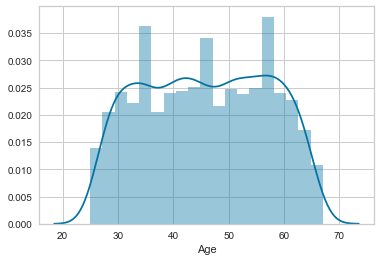

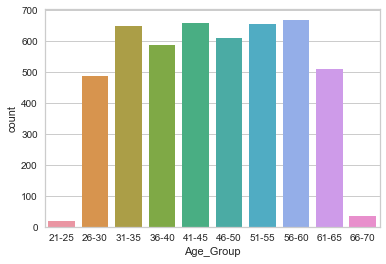

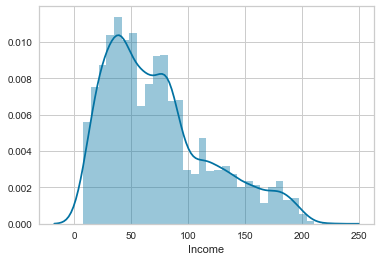

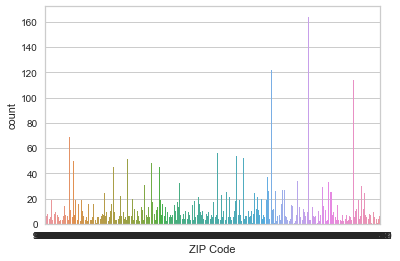

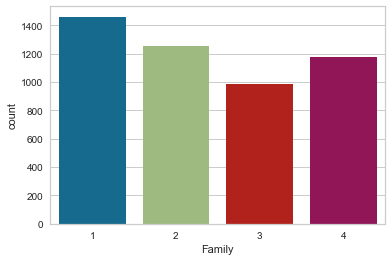

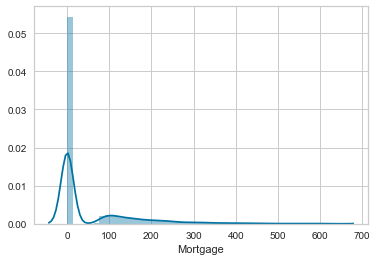

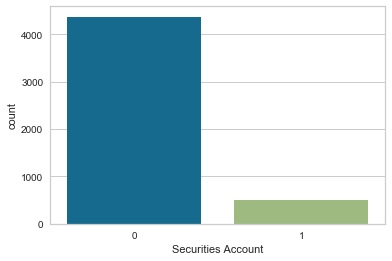

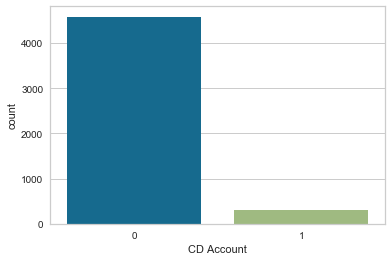

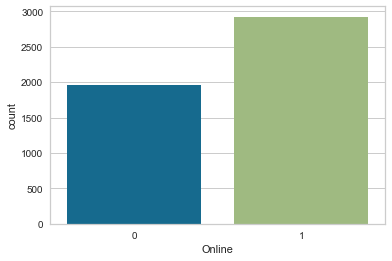

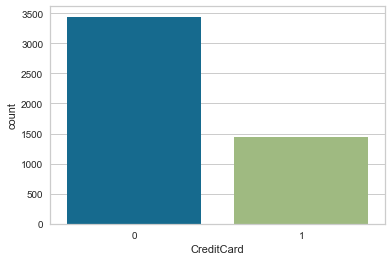

In [77]:
sns.distplot(exp_categorized_df['Age']);
plt.show()
sns.countplot(exp_categorized_df['Age_Group'])
plt.show()
sns.distplot(exp_categorized_df['Income']);
plt.show()
sns.countplot(exp_categorized_df['ZIP Code'])
plt.show()
sns.countplot(exp_categorized_df['Family'])
plt.show()
sns.distplot(exp_categorized_df['Mortgage'])
plt.show()
sns.countplot(exp_categorized_df['Securities Account'])
plt.show()
sns.countplot(exp_categorized_df['CD Account'])
plt.show()
sns.countplot(exp_categorized_df['Online'])
plt.show()
sns.countplot(exp_categorized_df['CreditCard'])
plt.show()

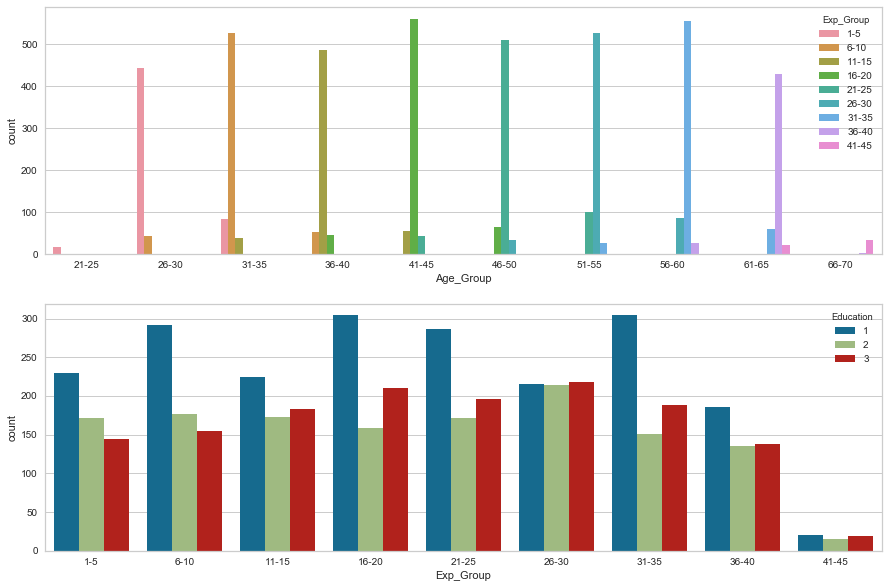

In [78]:
# here the dataframe used is exp_categorized_df which has categorization for age and experience.
# And the univariate charts are done for Age_Group, Experience_Group, Income
""" Age Group / Experience Group:  
            These plots are just to know what it looks like for example age group with a hue for experience indicates 
            generally  experience and age group are matching but for a few age group experience could be lower """ 

plt.figure(1,figsize=(15,10))
plt.subplot(211)
sns.countplot(exp_categorized_df['Age_Group'],hue=exp_categorized_df['Exp_Group'],orient='h');
"""Experience Group / Education :
            This plot gives an insight on the Education and Experience 
"""

plt.subplot(212)
sns.countplot(exp_categorized_df['Exp_Group'],hue=exp_categorized_df['Education'],orient='h');

In [79]:
# income / mortgage
# the plot of this chart does not give much insight so looks like grouping for income and mortgage is essential as well.

In [80]:
income_group_points=np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240])
income_group = [(income_group_points[i]+1,income_group_points[i+1]) for i in np.arange(len(income_group_points)-1)] # create exp_group range
modified_seed= exp_categorized_df.copy()
modified_seed['Income_Group']='1,000,000' # fill a temporary exp group for filtering purpose later down the line
mod1= pd.DataFrame() # a temporary dataframe to use later
income_categorized_df= pd.DataFrame() # final dataframe for result to use later
for interval in income_group:
    modified_seed.drop(modified_seed[modified_seed.Income_Group!='1,000,000'].index,axis=0, inplace=True)
    modified_seed['Income_Group']= modified_seed['Income'].apply(lambda x: str(interval[0])+"-"+str(interval[1]) if x>=interval[0] and x <=interval[1]  else '1,000,000')  
    mod1=modified_seed[modified_seed.Income_Group!='1,000,000']
    income_categorized_df=income_categorized_df.append(mod1,ignore_index=True)
exp_categorized_df
val_count_income_group= income_categorized_df.groupby('Income_Group')['Income'].count().reset_index(name='counts')
print(val_count_income_group['Income_Group'].value_counts(normalize=True))

201-210    0.043478
1-10       0.043478
181-190    0.043478
161-170    0.043478
11-20      0.043478
51-60      0.043478
101-110    0.043478
141-150    0.043478
91-100     0.043478
21-30      0.043478
211-220    0.043478
71-80      0.043478
191-200    0.043478
221-230    0.043478
61-70      0.043478
81-90      0.043478
31-40      0.043478
151-160    0.043478
111-120    0.043478
131-140    0.043478
171-180    0.043478
121-130    0.043478
41-50      0.043478
Name: Income_Group, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


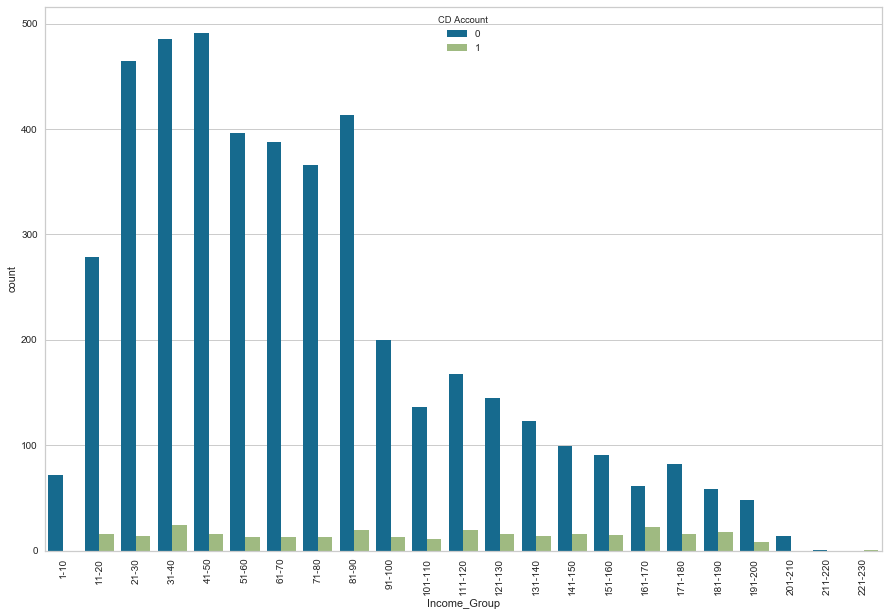

In [81]:
plt.figure(1,figsize=(15,10))
cnt_plt_chart=sns.countplot(income_categorized_df['Income_Group'],hue=income_categorized_df['CD Account'],orient='h');
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

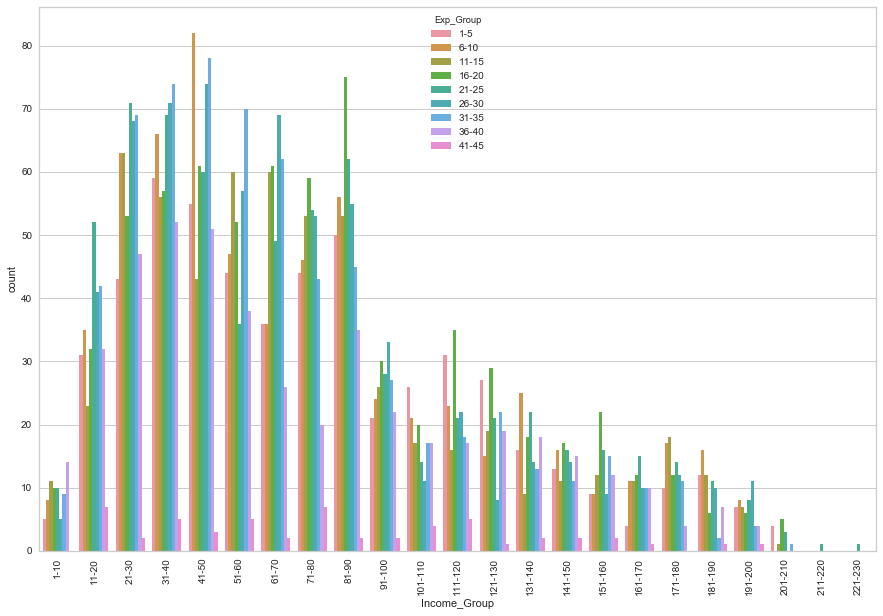

In [82]:
# sns.boxplot(x='Exp_Group',y='Income',data=income_categorized_df)
plt.figure(1,figsize=(15,10))
cnt_plt_chart=sns.countplot(income_categorized_df['Income_Group'],hue=income_categorized_df['Exp_Group'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

##### Bi Variate Plots

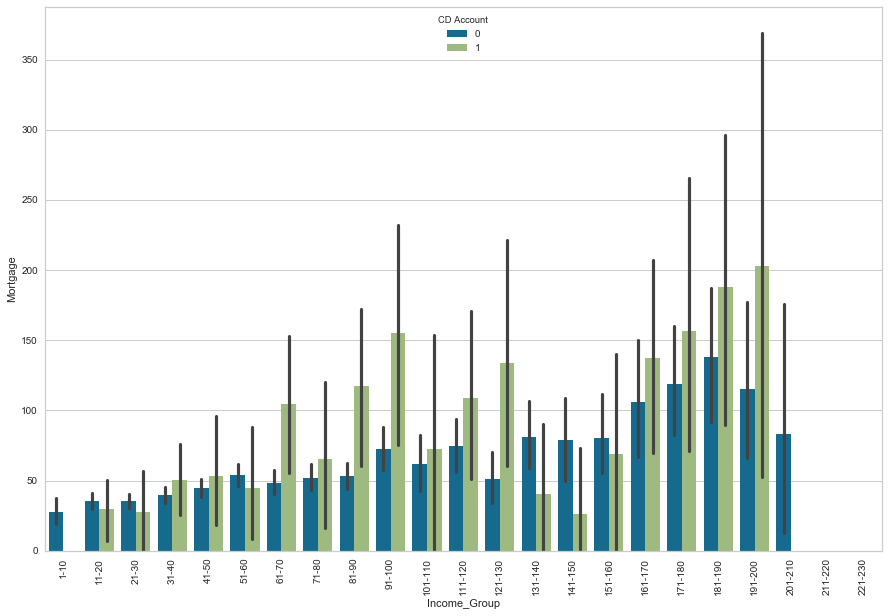

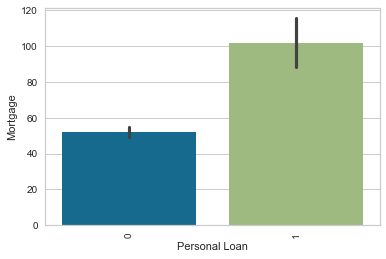

In [83]:
# plotting for mortgage/income group with deposits
plt.figure(1,figsize=(15,10))
cnt_plt_chart = sns.barplot(x='Income_Group',y='Mortgage',data=income_categorized_df,hue='CD Account');
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);
plt.show()
cnt_plt_chart = sns.barplot(x='Personal Loan',y='Mortgage',data=income_categorized_df);
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);
plt.show()
# -------------------------------------inferences----
#   high income earners have more mortgages and have CD Account from the first graph
#   More mortgagees tend to have personal loans than non-mortgagees

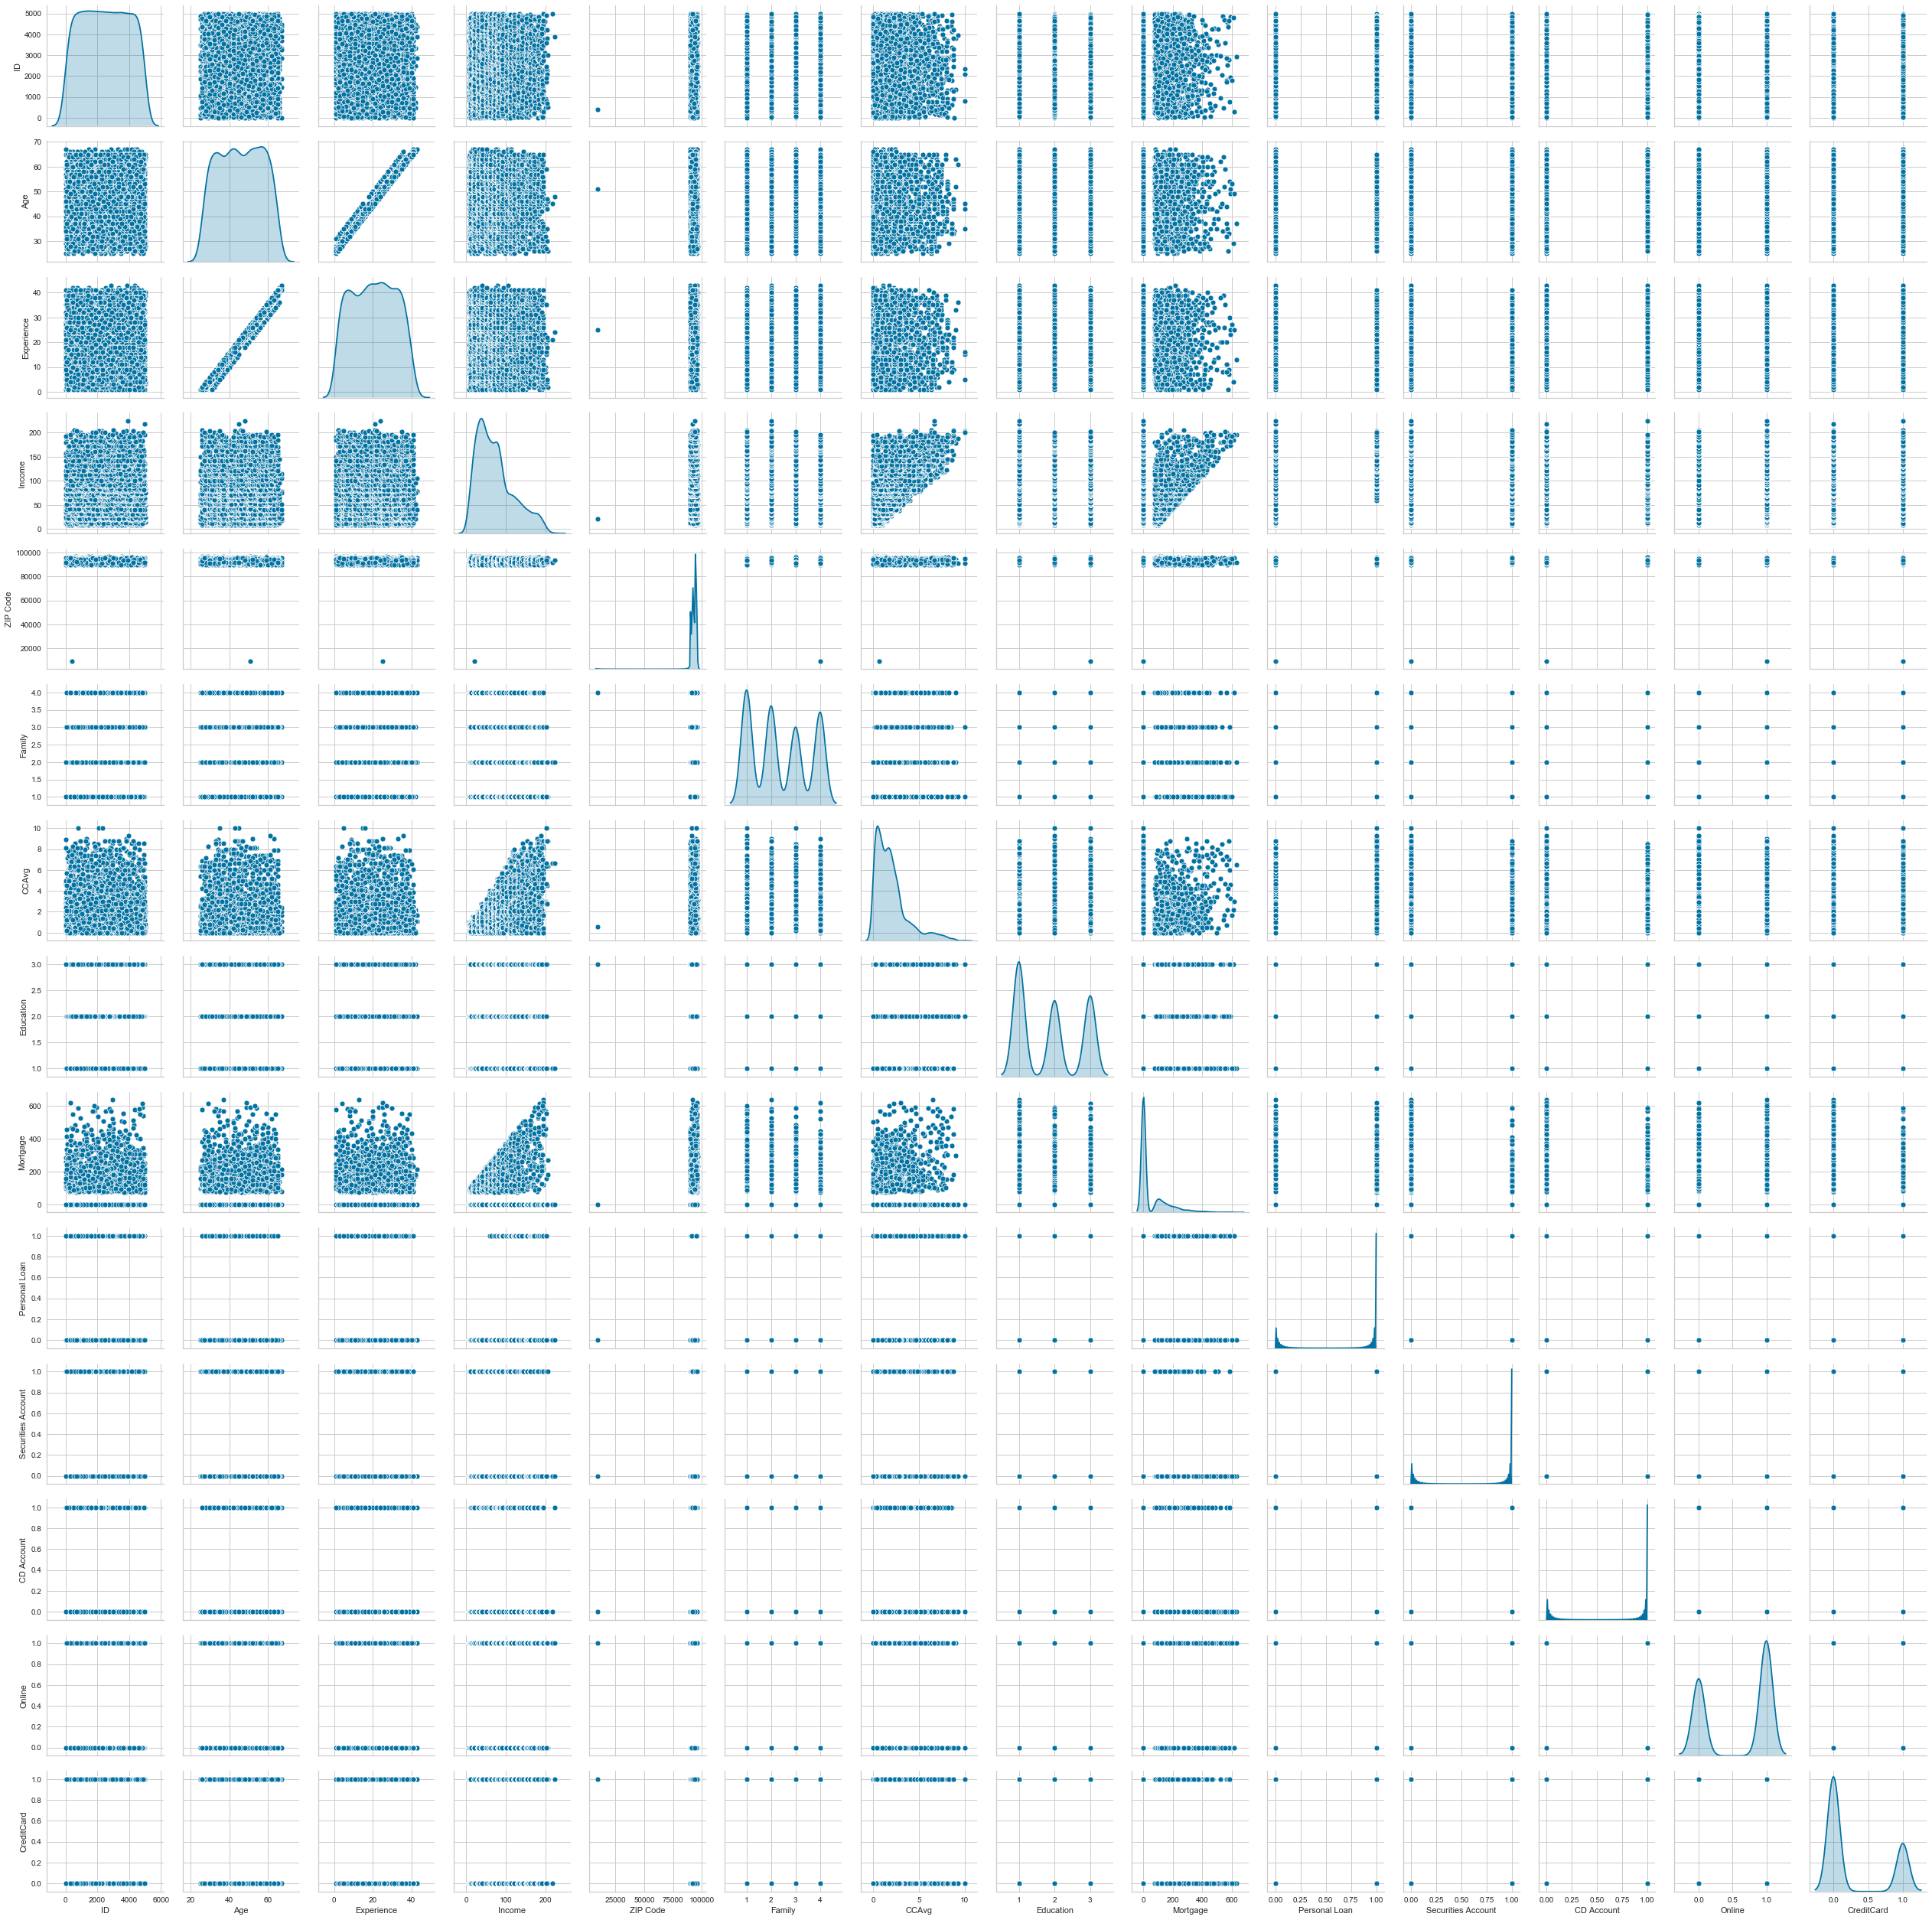

In [84]:
sns.pairplot(data=income_categorized_df,diag_kind='kde');

#### Findings for Q. No.2 based on the charts above

#####  Data Model Preparation

Tasks:
    1. Drop unnecessary columns - ID, Age, Zip Code
    2. Create dummies for Education and Income_Group
    3. No further imputation required as there are no null values and negative experiences were imputed with zeroes previously.

In [85]:
data_model=income_categorized_df.drop(columns=['ID','Age','ZIP Code'],axis=1)
dummified_dm=pd.get_dummies(data_model,columns=['Education','Income_Group','Exp_Group'],prefix=['Edu','Inc','Exp'],drop_first=True)
dummified_dm.to_csv('formatted_data_thera.csv')
dummified_dm.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Age_Group',
       'Edu_2', 'Edu_3', 'Inc_101-110', 'Inc_11-20', 'Inc_111-120',
       'Inc_121-130', 'Inc_131-140', 'Inc_141-150', 'Inc_151-160',
       'Inc_161-170', 'Inc_171-180', 'Inc_181-190', 'Inc_191-200',
       'Inc_201-210', 'Inc_21-30', 'Inc_211-220', 'Inc_221-230', 'Inc_31-40',
       'Inc_41-50', 'Inc_51-60', 'Inc_61-70', 'Inc_71-80', 'Inc_81-90',
       'Inc_91-100', 'Exp_11-15', 'Exp_16-20', 'Exp_21-25', 'Exp_26-30',
       'Exp_31-35', 'Exp_36-40', 'Exp_41-45', 'Exp_6-10'],
      dtype='object')

In [86]:
X=dummified_dm.drop(columns=['Personal Loan','Income','Age_Group','Experience'])
y=dummified_dm['Personal Loan']
X.columns

Index(['Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_2', 'Edu_3', 'Inc_101-110', 'Inc_11-20',
       'Inc_111-120', 'Inc_121-130', 'Inc_131-140', 'Inc_141-150',
       'Inc_151-160', 'Inc_161-170', 'Inc_171-180', 'Inc_181-190',
       'Inc_191-200', 'Inc_201-210', 'Inc_21-30', 'Inc_211-220', 'Inc_221-230',
       'Inc_31-40', 'Inc_41-50', 'Inc_51-60', 'Inc_61-70', 'Inc_71-80',
       'Inc_81-90', 'Inc_91-100', 'Exp_11-15', 'Exp_16-20', 'Exp_21-25',
       'Exp_26-30', 'Exp_31-35', 'Exp_36-40', 'Exp_41-45', 'Exp_6-10'],
      dtype='object')

In [87]:
# non_mortgagees_only_df=income_categorized_df[income_categorized_df['Mortgage']==0]
# depositors_CD_SA =income_categorized_df[(income_categorized_df['CD Account']==1)]# | (income_categorized_df['Securities Account']==1)]
# non_mortgagees_only_df
# depositors_CD_SA
# plt.figure(1,figsize=(15,10))
# cnt_plt_chart = sns.barplot(x='Income_Group',y='CCAvg',data=deposit_holders_only_df,hue='CD Account');
# cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);


##### 3. Split into train test data

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.columns

Index(['Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_2', 'Edu_3', 'Inc_101-110', 'Inc_11-20',
       'Inc_111-120', 'Inc_121-130', 'Inc_131-140', 'Inc_141-150',
       'Inc_151-160', 'Inc_161-170', 'Inc_171-180', 'Inc_181-190',
       'Inc_191-200', 'Inc_201-210', 'Inc_21-30', 'Inc_211-220', 'Inc_221-230',
       'Inc_31-40', 'Inc_41-50', 'Inc_51-60', 'Inc_61-70', 'Inc_71-80',
       'Inc_81-90', 'Inc_91-100', 'Exp_11-15', 'Exp_16-20', 'Exp_21-25',
       'Exp_26-30', 'Exp_31-35', 'Exp_36-40', 'Exp_41-45', 'Exp_6-10'],
      dtype='object')

##### 4. Model fitting & predict likelihood of a customer buying personal loan

In [89]:
# Model fit

In [90]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=50,solver='lbfgs',max_iter=800) # 800 to avoid warnings
logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
# computation of metrics

In [92]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,classification_report

In [93]:
# function to draw confusion matrix in a good format
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.9, 
           'rotation':"horizontal",
           'horizontalalignment':'center',
           'verticalalignment':'center',
           'backgroundcolor':'w'}
def draw_confusion_m(actual,predicted):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='0',linewidths=.8,annot_kws=annot_kws);
    
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
confusion_matrix(y_test,y_predict)

array([[1313,   11],
       [  44,   97]], dtype=int64)

###### Metrics

--------------------Classification Report-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1324
           1       0.90      0.69      0.78       141

    accuracy                           0.96      1465
   macro avg       0.93      0.84      0.88      1465
weighted avg       0.96      0.96      0.96      1465

--------------------Alternatively-------------------------------------------------------
Training accuracy 96.57594381035996

Testing accuracy 96.24573378839591

Training and Testing accuracies are so close and underfitting or overfitting is not relevant here.


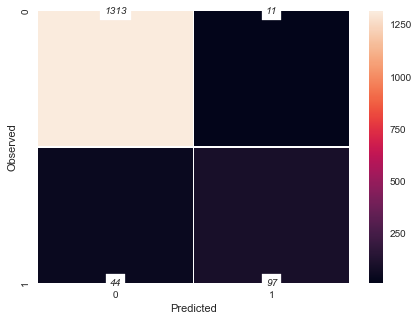

None
Recall: 0.6879432624113475

Precision: 0.8981481481481481


In [94]:
print('--------------------Classification Report-------------------------------------------------------')

print(classification_report(y_test,y_predict))

print('--------------------Alternatively-------------------------------------------------------')
print("Training accuracy",logreg.score(X_train, y_train)*100)  
print()
print("Testing accuracy",logreg.score(X_test, y_test)*100)
print()
print('Training and Testing accuracies are so close and underfitting or overfitting is not relevant here.')
print(draw_confusion_m(y_test,y_predict))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))


In [95]:
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

F1 Score: 0.7791164658634538

Roc Auc Score: 0.8398175526558248


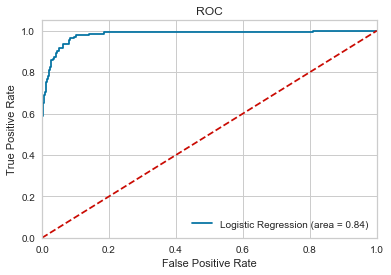

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

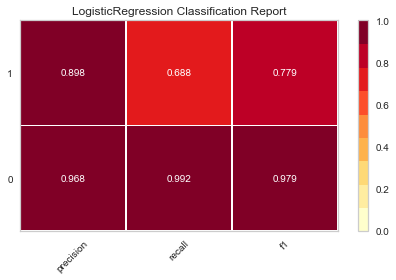

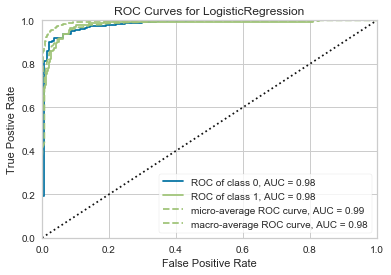

In [97]:
# trying out with yellow bricks

from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

##### 5. Reasoning for better model performance

##### 6. Business Understanding of model

In [98]:
print(X_test.columns)

Index(['Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_2', 'Edu_3', 'Inc_101-110', 'Inc_11-20',
       'Inc_111-120', 'Inc_121-130', 'Inc_131-140', 'Inc_141-150',
       'Inc_151-160', 'Inc_161-170', 'Inc_171-180', 'Inc_181-190',
       'Inc_191-200', 'Inc_201-210', 'Inc_21-30', 'Inc_211-220', 'Inc_221-230',
       'Inc_31-40', 'Inc_41-50', 'Inc_51-60', 'Inc_61-70', 'Inc_71-80',
       'Inc_81-90', 'Inc_91-100', 'Exp_11-15', 'Exp_16-20', 'Exp_21-25',
       'Exp_26-30', 'Exp_31-35', 'Exp_36-40', 'Exp_41-45', 'Exp_6-10'],
      dtype='object')


In [99]:
print(X_test.head())


      Family  CCAvg  Mortgage  Securities Account  CD Account  Online  \
1891       4    1.6         0                   0           1       1   
1821       1    0.5         0                   0           0       0   
3883       1    3.2         0                   0           0       1   
804        3    0.7         0                   0           0       1   
3316       2    2.4         0                   0           0       1   

      CreditCard  Edu_2  Edu_3  Inc_101-110  ...  Inc_81-90  Inc_91-100  \
1891           1      0      0            0  ...          0           0   
1821           1      0      1            0  ...          0           0   
3883           0      0      1            0  ...          0           0   
804            0      1      0            0  ...          0           0   
3316           0      1      0            0  ...          1           0   

      Exp_11-15  Exp_16-20  Exp_21-25  Exp_26-30  Exp_31-35  Exp_36-40  \
1891          0          0          